In [40]:
#@title Librerias
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.integrate import quad, fixed_quad, trapezoid, simpson
from sympy import symbols, diff, integrate, lambdify
from scipy.integrate import quad, nquad
import scipy.integrate as spi

# Parcial II - Métodos Computacionales (Integrales y Matrices)
**2024-2**

---

*Nombre:Edgar Junior Córdoba Gamboa

*Identificación: 1004012619

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub (en su carpeta) y recuerde hacer pull-request

# 1

**(20 puntos)**
Considera la siguiente integral:

$$
I = \int_0^1 \int_{x^2}^{x+1} \int_{y^2}^{y+2} \int_{z^2}^{z+3} (x+y+z+w) \, dw \, dz \, dy \, dx
$$

Encuentre la solución númerica usando unicamente `quad`. Encuentre el error relativo, para esto emplee el siguiente código que usa `nquad`:


```python
# Definir el integrando
integrand = lambda w, z, y, x: x + y + z + w

# Definir los límites usando funciones lambda
w_limits = lambda z, y, x: [z**2, z+3]
z_limits = lambda y, x: [y**2, y+2]
y_limits = lambda x: [x**2, x+1]
x_limits = lambda: [0, 1]

# Calcular la integral usando nquad
result, error = nquad(
    integrand,
    [w_limits, z_limits, y_limits, x_limits]
)

print(f"Resultado de la integral: {result}")
print(f"Error estimado: {error}")
```



In [49]:
fw = lambda w,z,y,x: x + y + z + w # Definimos La funcion a integrar
#Limites de cada función
w_l = lambda z,y, x: [z**2,z+3]
z_l = lambda y,x: [y**2, y+2]
y_l = lambda x: [x**2, x+1]
x_l = lambda : [0,1]

# Funciones para las distintas Intengrales
def inte_quad():
    def int_w(z, y, x):
        return spi.quad(lambda w: fw(w, z, y, x), *w_l(z,y,x))[0]
    def int_z(y,x):
      return spi.quad(lambda z: int_w(z,y,x), *z_l(y,x))[0]
    def int_y(x):
      return spi.quad(lambda y: int_z(y,x), *y_l(x))[0]
# Errores obtenidos por quad
    res, error = spi.quad(lambda x: int_y(x),*x_l())
    return res

# Calculamos la integral usando nquad
result_nquad, error_nquad = nquad(fw, [w_l, z_l, y_l, x_l])

# Resultado con quad
quad_result = inte_quad()
error_r = abs(quad_result - result_nquad) / abs(result_nquad)

print(f'Resultado con quad: {quad_result:.2f}')
print(f'Resultado con nquad: {result_nquad:.2f}')
print(f'Error relativo: {error_r:.2e}')


Resultado con quad: -0.65
Resultado con nquad: -0.65
Error relativo: 0.00e+00


# 2

**(40 puntos)**
Un lazo de corriente de radio $a$  transporta una corriente $I$ en el punto P que está a una distancia $r$ del centro del lazo con coordenadas esféricas (r, θ, φ). Resuelve para la componente φ del potencial vectorial en el punto $P$ en términos de integrales elípticas:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}

donde

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}

\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

Aquí, $K(k)$ es una integral elíptica completa del primer tipo y $E(k)$ es una integral elíptica completa del segundo tipo.


Para
* $a$ = 1,
* $I$ = 3,
* $μ0/4π$ = 1


Usando funciones explicitas explique claramente las entradas, salidas y procedimientos dentro de las mismas. Recuerde para resolver las integrales usar `quad` y grafique para:

*a)* $A_φ(r = 1.1, θ)$ vs. $0\leq θ\leq \pi$

*b)* $A_φ(r, θ = π∕3)$ vs. $0\leq r \leq 10$

Tenga cuidado con la convergencia de su integral



<ipython-input-67-85bc12c0040e>:23: RuntimeWarning: invalid value encountered in scalar divide
  return factor * ((2 - k2) * Kk - 2 * Ek) / k2


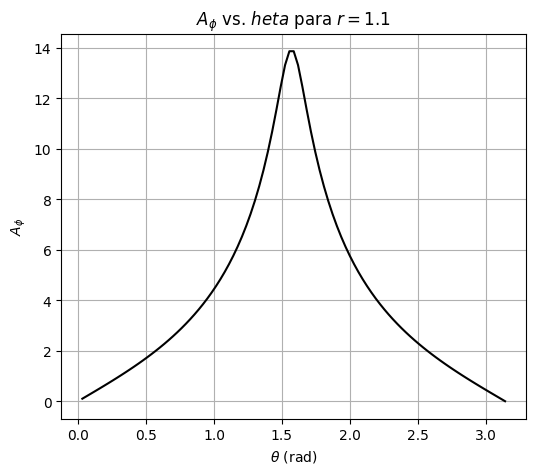

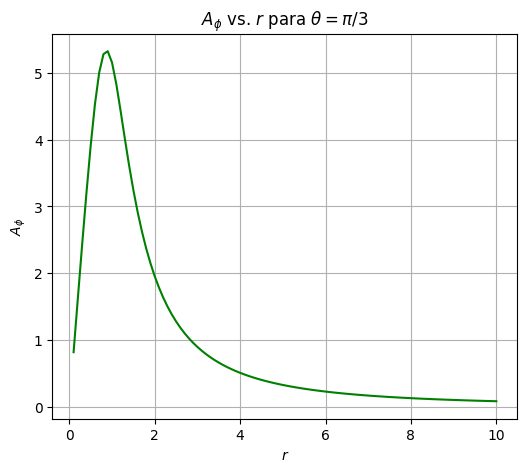

In [67]:
# Definimos Parametros
a = 1
I = 3
m_4pi = 1
#Definimos la funcion que depende de r y theta
def k_s(r, theta):
    return (4 * a * r * np.sin(theta)) / (a**2 + r**2 + 2 * a * r * np.sin(theta))
#Integral eliptica K
def K_int(k):
    inte = lambda phi: 1 / np.sqrt(1 - k**2 * np.sin(phi)**2)
    return quad(inte, 0, np.pi/2)[0]
#Integral Eliptica E
def E_int(k):
    inte = lambda phi: np.sqrt(1 - k**2 * np.sin(phi)**2)
    return quad(inte, 0, np.pi/2)[0]

def A_phi(r, theta):
    k2 = k_s(r, theta)
    k = np.sqrt(k2)
    Kk = K_int(k)
    Ek = E_int(k)
    factor = (m_4pi * 4 * I * a) / np.sqrt(a**2 + r**2 + 2 * a * r * np.sin(theta))
    return factor * ((2 - k2) * Kk - 2 * Ek) / k2

#Grafica a
theta_v= np.linspace(0, np.pi, 100)
A_phi_vals_theta = [A_phi(1.1, theta) for theta in theta_v]
plt.figure(figsize=(6, 5))
plt.plot(theta_v, A_phi_vals_theta,color = 'black', label=r'$A_\phi(r=1.1, 	heta)$')
plt.xlabel(r'$\theta$ (rad)')
plt.ylabel(r'$A_\phi$')
plt.title(r'$A_\phi$ vs. $	heta$ para $r=1.1$')
plt.grid()

# Gráfica b
r_vals = np.linspace(0.1, 10, 100)
A_phi_vals_r = [A_phi(r, np.pi/3) for r in r_vals]
plt.figure(figsize=(6, 5))
plt.plot(r_vals, A_phi_vals_r,color = 'green', label=r'$A_\phi(r, 	heta=\pi/3)$')
plt.xlabel(r'$r$')
plt.ylabel(r'$A_\phi$')
plt.title(r'$A_\phi$ vs. $r$ para $\theta=\pi/3$')
plt.grid()

# 3

(**40 puntos**) El **método de la potencia inversa** es una técnica iterativa utilizada para calcular el autovalor de menor magnitud de una matriz cuadrada. Es una variante del **método de la potencia**, que normalmente encuentra el autovalor de mayor magnitud. Para ello, se aprovecha la propiedad de la matriz inversa:

$$ A^{-1} v = \frac{1}{\lambda} v $$


## Algoritmo

El método de la potencia inversa sigue los siguientes pasos:

1. Elegir un vector inicial $x^{(0)}$ no nulo.

2. Para cada iteración $k$, resolver el sistema lineal:
   
   $$ A y^{(k)} = x^{(k-1)} $$
   
   donde $y^{(k)}$ es un **vector intermedio** que se obtiene resolviendo el sistema lineal. Este vector representa la solución del sistema en cada iteración y es crucial para aproximar el autovector de menor autovalor.

3. Normalizar $y^{(k)}$ para obtener un nuevo vector de iteración:
   
   $$ x^{(k)} = \frac{y^{(k)}}{\| y^{(k)} \|} $$
   
4. Aproximar el autovalor mediante el cociente de Rayleigh:
   
   $$ \lambda^{(k)} = \frac{(x^{(k)})^T A x^{(k)}}{(x^{(k)})^T x^{(k)}} $$
   
5. Repetir los pasos anteriores hasta que la diferencia entre valores sucesivos de $\lambda$ sea menor que un umbral de tolerancia.

---

*a)* Escriba una función llamada `potencia_inversa` que dada una matriz A encuentre su valor propio menos dominante (con una tolerancia de 1e-7 usando la norma Euclidiana) y su correspondiente autovector. Para obtener $y^{(k)}$ puede emplear `np.linalg.solve` recordando que $Ay = x$.

*b)* Usando la matriz A, encuentre el $\lambda_{min}$ y el correspondiente autovector. Examine la convergencia de su autovalor en función de las iteraciones, esto es, haga un gráfico de $\lambda(k)$

$$
\begin{bmatrix}
5 & 2 \\
2 & 2
\end{bmatrix}
$$

*c)* Compare su resultado con `np.linalg.eig`

In [ ]:
def potencia_inversa(A,x, tol= 1e-7,max_iter=100):
# No me dio profe me falto nivel

#4

**(10 puntos)**
Sea $A$ una matriz cuadrada de tamaño $n \times n$. Se sabe que el determinante de una matriz es igual al producto de sus autovalores:

$$
\det(A) = \prod_{i=1}^{n} \lambda_i
$$

donde $\lambda_1, \lambda_2, \dots, \lambda_n$ son los autovalores de $A$.

Usando una matriz aleatoria $A$ de $5\times 5$, demuestre esta propiedad. Puede usar las funciones de `np.linalg`.

In [58]:
A = np.array([1,3,5,7,9,12,5,7,4,21,9,5,6,4,8,24,16,18,12,11,9,42,7,10,9]).reshape(5,5) # Definimos La matriz
det = np.linalg.det(A) # calculamos el determinante
values = np.linalg.eigvals(A) #Encontramos los valores propios de la matriz
det_a = np.prod(values)  # Calculamos la productoria
print('El determinante de los autovalores de A es:',det_a) # El resultado de la productororia
print('El determinante de A es :', det) # El Resultadi de el determinante de A

El determinante de los autovalores de A es: -26276.000000000207
El determinante de A es : -26276.000000000033
